In [1]:
#Imports 
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib as mpl

In [2]:
#Estimators 2
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [3]:
#Model Metrics 2
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import cross_val_score
#Cross Validation 2
from sklearn.model_selection import train_test_split

In [4]:
Data1 = pd.read_csv('bank-additional-full.csv', delimiter = ';')
Data1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [70]:
Data1.dropna()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
Data1.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
Data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [6]:
header = Data1.dtypes.index
print(header)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


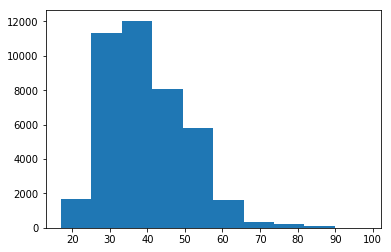

In [9]:
plt.hist(Data1['age'])
plt.show()

In [100]:
age = Data1['age'].dropna()

Text(0.5, 1.0, "Distribution of Passengers' Ages")

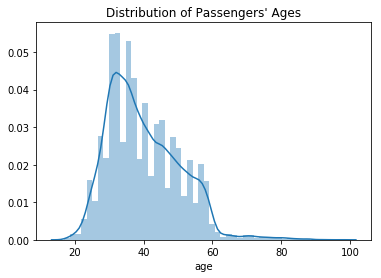

In [101]:
age_dist = sns.distplot(age)
age_dist.set_title("Distribution of Clients' Ages")

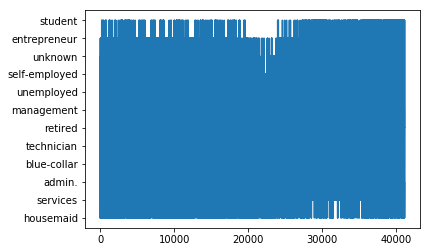

In [11]:
plt.plot(Data1['job'])
plt.show()

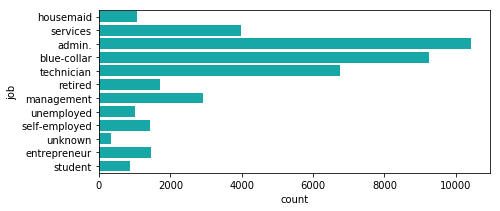

In [17]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="job", data=Data1, color="c");

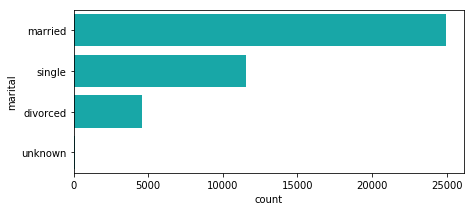

In [18]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="marital", data=Data1, color="c");

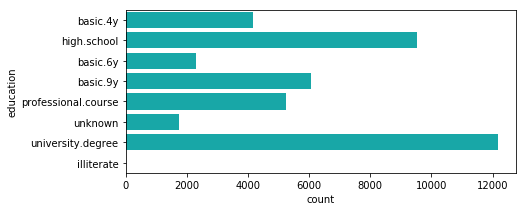

In [19]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="education", data=Data1, color="c");

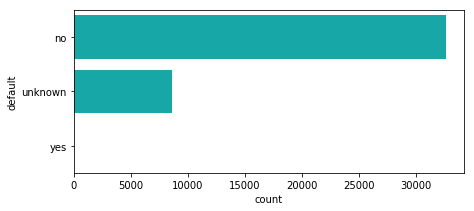

In [20]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="default", data=Data1, color="c");

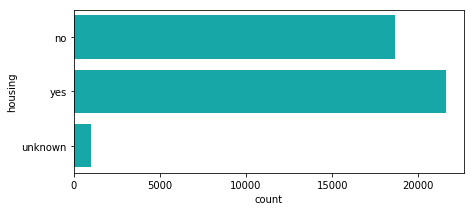

In [21]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="housing", data=Data1, color="c");

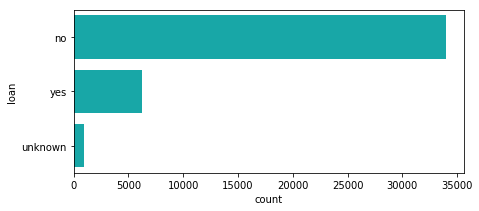

In [22]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="loan", data=Data1, color="c");

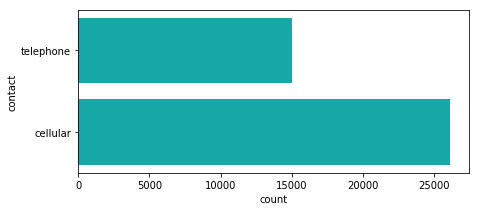

In [23]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="contact", data=Data1, color="c");

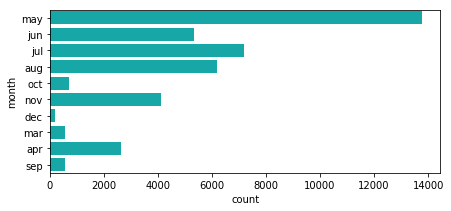

In [24]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="month", data=Data1, color="c");

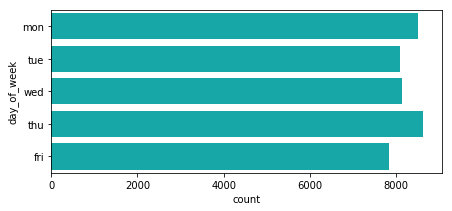

In [25]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="day_of_week", data=Data1, color="c");

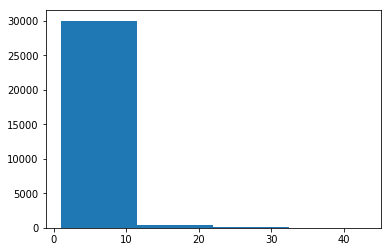

In [44]:
plt.hist(Data1['campaign'], bins=4)
plt.show()

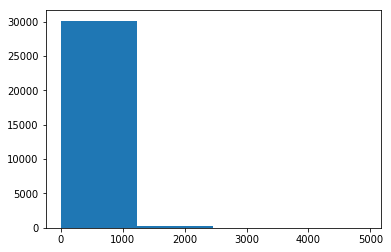

In [43]:
plt.hist(Data1['duration'], bins=4)
plt.show()

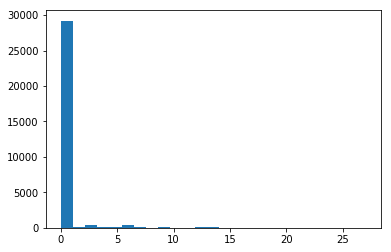

In [42]:
plt.hist(Data1['pdays'], bins=25)
plt.show()

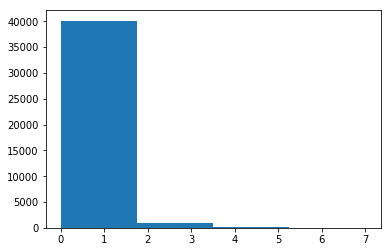

In [16]:
plt.hist(Data1['previous'], bins=4)
plt.show()

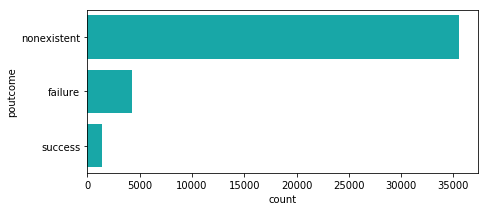

In [17]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="poutcome", data=Data1, color="c");

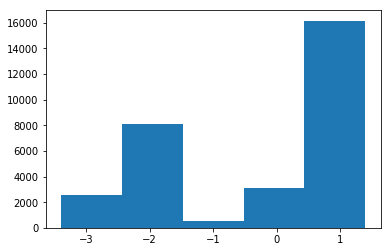

In [45]:
plt.hist(Data1['emp.var.rate'], bins=5)
plt.show()

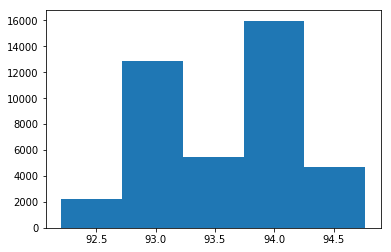

In [21]:
plt.hist(Data1['cons.price.idx'], bins=5)
plt.show()

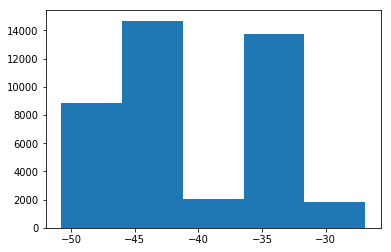

In [23]:
plt.hist(Data1['cons.conf.idx'], bins=5)
plt.show()

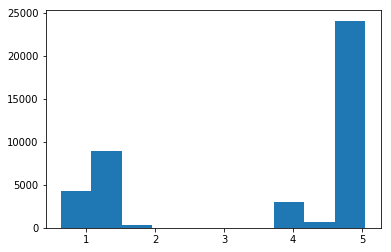

In [24]:
plt.hist(Data1['euribor3m'])
plt.show()

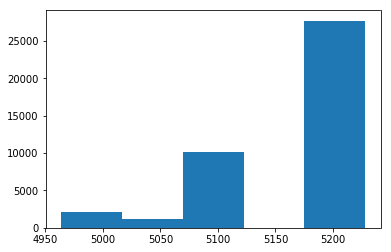

In [25]:
plt.hist(Data1['nr.employed'], bins=5)
plt.show()

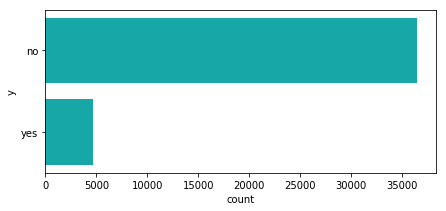

In [94]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="y", data=Data1, color="c");

In [91]:
Data1.groupby(['education', 'y'])['education'].count()

education            y  
basic.4y             no      3748
                     yes      428
basic.6y             no      2104
                     yes      188
basic.9y             no      5572
                     yes      473
high.school          no      8484
                     yes     1031
illiterate           no        14
                     yes        4
professional.course  no      4648
                     yes      595
university.degree    no     10498
                     yes     1670
unknown              no      1480
                     yes      251
Name: education, dtype: int64

c:\users\esteban vargas\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


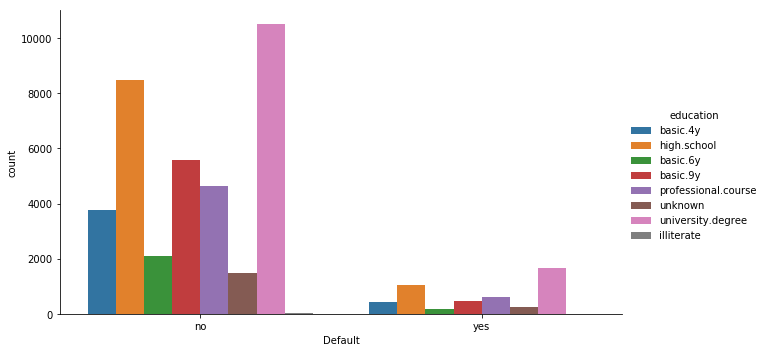

In [93]:
g = sns.factorplot('y', data=Data1, hue='education', kind='count', aspect=1.75)
g.set_xlabels('Default')

In [95]:
Data1.groupby(['job', 'y'])['job'].count()

job            y  
admin.         no     9070
               yes    1352
blue-collar    no     8616
               yes     638
entrepreneur   no     1332
               yes     124
housemaid      no      954
               yes     106
management     no     2596
               yes     328
retired        no     1286
               yes     434
self-employed  no     1272
               yes     149
services       no     3646
               yes     323
student        no      600
               yes     275
technician     no     6013
               yes     730
unemployed     no      870
               yes     144
unknown        no      293
               yes      37
Name: job, dtype: int64

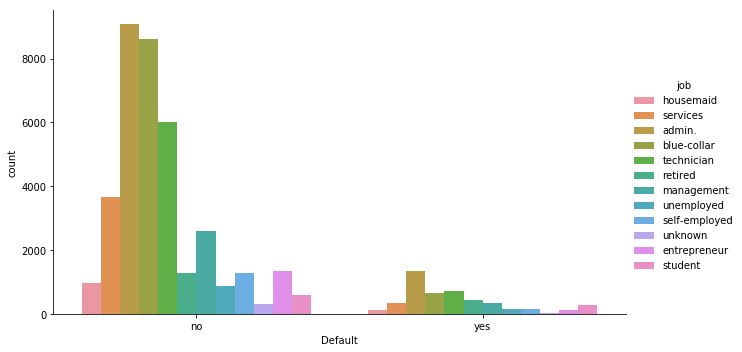

In [96]:
g = sns.factorplot('y', data=Data1, hue='job', kind='count', aspect=1.75)
g.set_xlabels('Default')

In [162]:
Data1.groupby(['poutcome', 'y'])['poutcome'].count()

poutcome     y
failure      0     2953
             1      508
nonexistent  0    23264
             1     2572
success      0      412
             1      779
Name: poutcome, dtype: int64

c:\users\esteban vargas\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


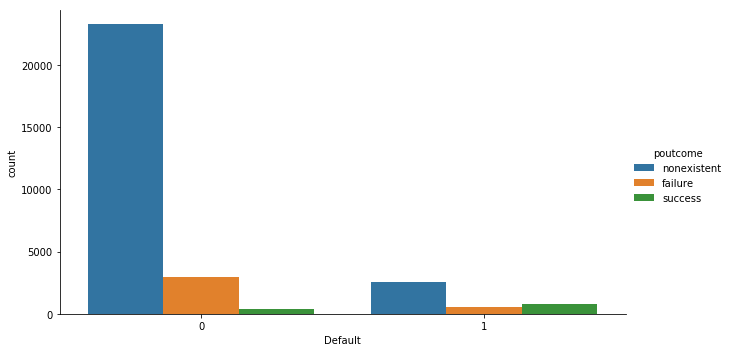

In [163]:
g = sns.factorplot('y', data=Data1, hue='poutcome', kind='count', aspect=1.75)
g.set_xlabels('Default')

In [97]:
Data1.groupby(['marital', 'y'])['marital'].count()

marital   y  
divorced  no      4136
          yes      476
married   no     22396
          yes     2532
single    no      9948
          yes     1620
unknown   no        68
          yes       12
Name: marital, dtype: int64

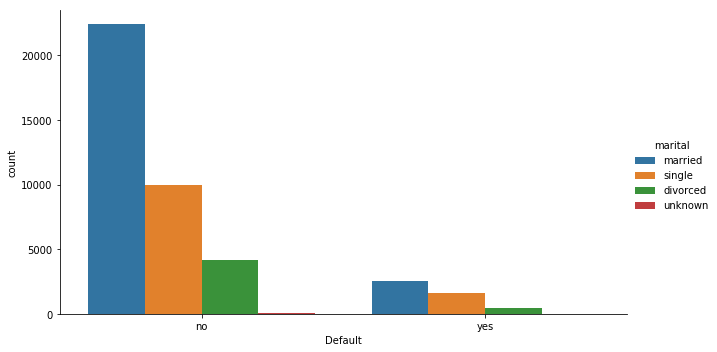

In [98]:
g = sns.factorplot('y', data=Data1, hue='marital', kind='count', aspect=1.75)
g.set_xlabels('Default')

In [102]:
Data1.groupby(['contact', 'y'])['contact'].count()

contact    y  
cellular   no     22291
           yes     3853
telephone  no     14257
           yes      787
Name: contact, dtype: int64

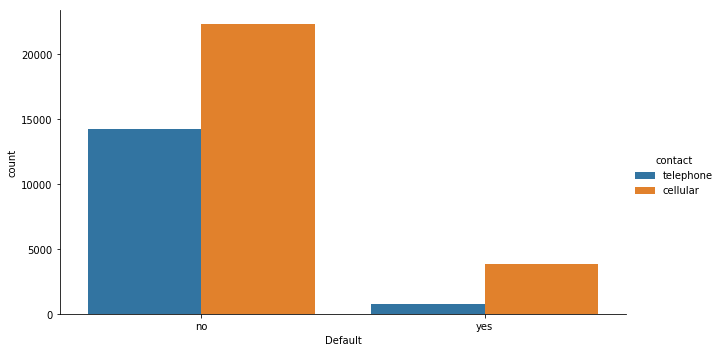

In [103]:
g = sns.factorplot('y', data=Data1, hue='contact', kind='count', aspect=1.75)
g.set_xlabels('Default')

In [27]:
corrMat = Data1.corr()
print(corrMat)

                     age  duration  campaign     pdays  previous  \
age             1.000000 -0.000866  0.004594 -0.034369  0.024365   
duration       -0.000866  1.000000 -0.071699 -0.047577  0.020640   
campaign        0.004594 -0.071699  1.000000  0.052584 -0.079141   
pdays          -0.034369 -0.047577  0.052584  1.000000 -0.587514   
previous        0.024365  0.020640 -0.079141 -0.587514  1.000000   
emp.var.rate   -0.000371 -0.027968  0.150754  0.271004 -0.420489   
cons.price.idx  0.000857  0.005312  0.127836  0.078889 -0.203130   
cons.conf.idx   0.129372 -0.008173 -0.013733 -0.091342 -0.050936   
euribor3m       0.010767 -0.032897  0.135133  0.296899 -0.454494   
nr.employed    -0.017725 -0.044703  0.144095  0.372605 -0.501333   

                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age                -0.000371        0.000857       0.129372   0.010767   
duration           -0.027968        0.005312      -0.008173  -0.032897   
campaign            0.150754 

In [4]:
covMat = Data1.cov()
print(covMat)

                       age      duration   campaign         pdays   previous  \
age             108.602451     -2.339147   0.132603    -66.945400   0.125661   
duration         -2.339147  67225.728877 -51.494888  -2305.683015   2.648520   
campaign          0.132603    -51.494888   7.672975     27.224921  -0.108494   
pdays           -66.945400  -2305.683015  27.224921  34935.687284 -54.346448   
previous          0.125661      2.648520  -0.108494    -54.346448   0.244927   
emp.var.rate     -0.006069    -11.391802   0.656017     79.574823  -0.326918   
cons.price.idx    0.005168      0.797272   0.204971      8.535132  -0.058190   
cons.conf.idx     6.239801     -9.807412  -0.176061    -79.016677  -0.116670   
euribor3m         0.194622    -14.793831   0.649236     96.250874  -0.390128   
nr.employed     -13.346160   -837.439866  28.838822   5031.877477 -17.926342   

                emp.var.rate  cons.price.idx  cons.conf.idx   euribor3m  \
age                -0.006069        0.005168

In [5]:
def tran_y(x):
    if x == 'no':
        return 0
    if x == 'yes':
        return 1

In [6]:
Data1['y'] = Data1['y'].apply(tran_y)

In [7]:
##job
def tran_job(x):
    if x == 'admin.':
        return 0
    if x == 'blue-collar':
        return 1
    if x == 'entrepreneur':
        return 2
    if x == 'housemaid':
        return 3
    if x == 'management':
        return 4
    if x == 'retired':
        return 5
    if x == 'self-employed':
        return 6
    if x == 'services':
        return 7
    if x == 'student':
        return 8
    if x == 'technician':
        return 9
    if x == 'unemployed':
        return 10
    if x == 'unknown':
        return 11

In [8]:
Data1['job'] = Data1['job'].apply(tran_job)

In [9]:
##marital
def tran_marital(x):
    if x == 'married':
        return 0
    if x == 'single':
        return 1
    if x == 'divorced':
        return 2
    if x == 'unknown':
        return 3

In [10]:
Data1['marital'] = Data1['marital'].apply(tran_marital)

In [11]:
##education
def tran_edu(x):
    if x == 'basic.4y':
        return 0
    if x == 'basic.6y':
        return 1
    if x == 'basic.9y':
        return 2
    if x == 'high.school':
        return 3
    if x == 'illiterate':
        return 4
    if x == 'professional.course':
        return 5
    if x == 'university.degree':
        return 6
    if x == 'unknown':
        return 7

In [12]:
Data1['education'] = Data1['education'].apply(tran_edu)

In [13]:
##default
def tran_def(x):
    if x == 'no':
        return 0
    if x == 'unknown':
        return 1
    if x == 'yes':
        return 2

In [14]:
Data1['default'] = Data1['default'].apply(tran_def)

In [15]:
##housing
def tran_hous(x):
    if x == 'no':
        return 0
    if x == 'yes':
        return 1
    if x == 'unknown':
        return 2

In [16]:
Data1['housing'] = Data1['housing'].apply(tran_hous)

In [17]:
##loan
def tran_lo(x):
    if x == 'no':
        return 0
    if x == 'yes':
        return 1
    if x == 'unknown':
        return 2

In [18]:
Data1['loan'] = Data1['loan'].apply(tran_lo)

In [19]:
##contact
def tran_con(x):
    if x == 'telephone':
        return 0
    if x == 'cellular':
        return 1

In [20]:
Data1['contact'] = Data1['contact'].apply(tran_con)

In [21]:
##month
def tran_mon(x):
    if x == 'may':
        return 0
    if x == 'jun':
        return 1
    if x == 'jul':
        return 2
    if x == 'aug':
        return 3
    if x == 'oct':
        return 4
    if x == 'nov':
        return 5
    if x == 'dec':
        return 6
    if x == 'mar':
        return 7
    if x == 'apr':
        return 8
    if x == 'sep':
        return 9

In [22]:
Data1['month'] = Data1['month'].apply(tran_mon)

In [23]:
##day_of_week
def tran_day(x):
    if x == 'mon':
        return 0
    if x == 'tue':
        return 1
    if x == 'wed':
        return 2
    if x == 'thu':
        return 3
    if x == 'fri':
        return 4

In [24]:
Data1['day_of_week'] = Data1['day_of_week'].apply(tran_day)

In [25]:
##poutcome
def tran_out(x):
    if x == 'failure':
        return 0
    if x == 'nonexistent':
        return 1
    if x == 'success':
        return 2

In [26]:
Data1['poutcome'] = Data1['poutcome'].apply(tran_out)
Data1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,0,0,0,0,0,0,0,0,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,0,3,1,0,0,0,0,0,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,0,3,0,1,0,0,0,0,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,0,1,0,0,0,0,0,0,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,0,3,0,0,1,0,0,0,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [28]:
Data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null int64
marital           41188 non-null int64
education         41188 non-null int64
default           41188 non-null int64
housing           41188 non-null int64
loan              41188 non-null int64
contact           41188 non-null int64
month             41188 non-null int64
day_of_week       41188 non-null int64
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null int64
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(5), int64(16)
memory usage: 6.6 MB


In [27]:
Data1 = Data1[Data1.marital != 3]

In [28]:
Data1 = Data1[Data1.loan != 2]

In [29]:
Data1 = Data1[Data1.housing != 2]

In [30]:
Data1 = Data1[Data1.default != 1]

In [31]:
Data1 = Data1[Data1.education != 7]

In [32]:
Data1 = Data1[Data1.job !=11]

In [33]:
Data1.replace({'pdays' : 999}, 0, inplace=True)

In [34]:
Data1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,0,0,0,0,0,0,0,0,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,0,3,0,1,0,0,0,0,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,0,1,0,0,0,0,0,0,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,0,3,0,0,1,0,0,0,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
6,59,0,0,5,0,0,0,0,0,0,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [34]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
data_scaled = pd.DataFrame(min_max_scaler.fit_transform(Data1), columns=Data1.columns)
data_scaled.head()

c:\users\esteban vargas\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.500000,0.3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.5,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
1,0.256410,0.7,0.0,0.500000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.5,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
2,0.294872,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.5,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
3,0.500000,0.7,0.0,0.500000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.5,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
4,0.538462,0.0,0.0,0.833333,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.5,0.9375,0.698753,0.60251,0.957379,0.859735,0.0


In [37]:
#features 
features = Data1.iloc[:,0:20]
print('Summary of feature sample')
features.head()

Summary of feature sample


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,0,0,0,0,0,0,0,0,261,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,0,3,0,1,0,0,0,0,226,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,0,1,0,0,0,0,0,0,151,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,0,3,0,0,1,0,0,0,307,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0
6,59,0,0,5,0,0,0,0,0,0,139,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0


In [38]:
#dependent variable 
depVar = Data1['y']

In [41]:
##NO
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [42]:
##NO
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(features, depVar)

In [43]:
##NO
# summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)
featuresf = fit.transform(features)

[4.498e+00 4.517e+00 3.826e+00 8.709e+00 4.348e-01 1.417e+00 6.498e-01
 2.079e+02 2.953e+02 4.725e-01 2.534e+02 1.691e+01 6.727e+02 3.185e+02
 4.996e+01 4.615e+02 5.104e+01 1.090e+01 7.708e+02 4.380e+02]


In [44]:
##NO
# summarize selected features
print(featuresf[0:5,:])

[[0.    0.938 0.957 0.86 ]
 [0.    0.938 0.957 0.86 ]
 [0.    0.938 0.957 0.86 ]
 [0.    0.938 0.957 0.86 ]
 [0.    0.938 0.957 0.86 ]]


In [39]:
#Training Set (Feature Space: X Training) 
X_train = (features[: 5000])
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,0,0,0,0,0,0,0,0,261,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,0,3,0,1,0,0,0,0,226,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,0,1,0,0,0,0,0,0,151,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,0,3,0,0,1,0,0,0,307,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0
6,59,0,0,5,0,0,0,0,0,0,139,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0


In [40]:
#Dependent Variable Training Set (y Training) 
y_train = depVar[: 5000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 5000


0    0
2    0
3    0
4    0
6    0
Name: y, dtype: int64

In [41]:
#Testing Set (X Testing) 
X_test = features[-500:]
X_test.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
40626,35,0,0,3,0,0,0,1,9,0,415,1,0,2,0,-1.1,94.199,-37.5,0.882,4963.6
40628,34,0,0,6,0,0,1,1,9,0,250,3,0,0,1,-1.1,94.199,-37.5,0.882,4963.6
40629,27,7,1,3,0,0,1,0,9,0,35,1,0,0,1,-1.1,94.199,-37.5,0.882,4963.6
40630,34,0,0,6,0,1,0,1,9,0,125,2,0,0,1,-1.1,94.199,-37.5,0.882,4963.6
40631,88,5,0,0,0,1,0,1,9,0,213,7,0,0,1,-1.1,94.199,-37.5,0.882,4963.6


In [42]:
#Ground Truth (y_test) 
y_test = depVar[-500:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 500


40626    1
40628    1
40629    0
40630    0
40631    0
Name: y, dtype: int64

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

In [44]:
X_train.shape, X_test.shape

((3750, 20), (1250, 20))

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape

((2812, 20), (938, 20))

In [46]:
#Models 
modelSVC = SVC(gamma='scale')
modelRF = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
modelKN = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [47]:
#features 2 
features = Data1.iloc[:,0:20]
print('Summary of feature sample')
features.head()

Summary of feature sample


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,0,0,0,0,0,0,0,0,261,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,0,3,0,1,0,0,0,0,226,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,0,1,0,0,0,0,0,0,151,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,0,3,0,0,1,0,0,0,307,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0
6,59,0,0,5,0,0,0,0,0,0,139,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0


In [48]:
#dependent variable 
depVar = Data1['y']

In [49]:
modelRF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [50]:
modelSVC.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [51]:
modelKN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [52]:
modelRF.fit(X_train,y_train)
print(cross_val_score(modelRF, X_train, y_train))
modelRF.score(X_train,y_train)

[0.96162047 0.96157951 0.96691569]


c:\users\esteban vargas\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.9957325746799431

In [53]:
modelSVC.fit(X_train,y_train)
print(cross_val_score(modelSVC, X_train, y_train)) 
modelSVC.score(X_train,y_train)

c:\users\esteban vargas\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[0.97014925 0.96905016 0.97118463]


0.9704836415362731

In [54]:
modelKN.fit(X_train,y_train)
print(cross_val_score(modelKN, X_train, y_train)) 
modelKN.score(X_train,y_train)

c:\users\esteban vargas\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[0.96268657 0.96584845 0.96798292]


0.9726173541963016

In [55]:
predictionsRF = modelRF.predict(X_test)

In [56]:
predictionsSVC = modelSVC.predict(X_test)

In [57]:
predictionsKN = modelKN.predict(X_test)

In [58]:
#2
accuracy_score(y_test, predictionsRF),cohen_kappa_score(y_test, predictionsRF)

(0.9626865671641791, 0.2073494615867496)

In [59]:
#2
accuracy_score(y_test, predictionsSVC),cohen_kappa_score(y_test, predictionsSVC)

(0.9658848614072495, 0.10586833482275837)

In [60]:
#2
accuracy_score(y_test, predictionsKN),cohen_kappa_score(y_test, predictionsKN)

(0.9605543710021321, 0.2828449807827417)

In [61]:
X_test['prediction'] = predictionsRF

In [62]:
X_test.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,prediction
4673,41,9,0,6,0,0,0,0,0,2,...,1,0,0,1,1.1,93.994,-36.4,4.858,5191.0,0
4231,34,0,0,6,0,0,0,0,0,1,...,1,0,0,1,1.1,93.994,-36.4,4.856,5191.0,0
251,41,1,0,0,0,1,0,0,0,0,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
7637,41,9,1,5,0,0,0,0,0,4,...,3,0,0,1,1.1,93.994,-36.4,4.864,5191.0,0
2964,52,0,1,2,0,0,0,0,0,2,...,2,0,0,1,1.1,93.994,-36.4,4.859,5191.0,0


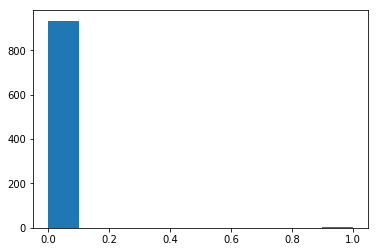

In [77]:
plt.hist(X_test['prediction'])
plt.show()

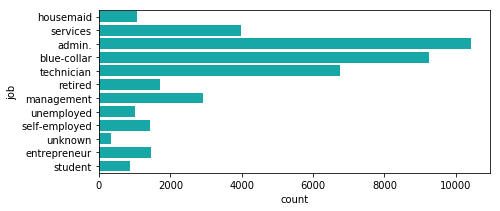

In [315]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="job", data=Data1, color="c");

In [347]:
Data1.groupby(['education', 'y'])['education'].count()

education  y
0          0    2054
           1     326
1          0    1253
           1     136
2          0    3896
           1     380
3          0    6765
           1     934
4          0       8
           1       3
5          0    3783
           1     538
6          0    8870
           1    1542
Name: education, dtype: int64

Education


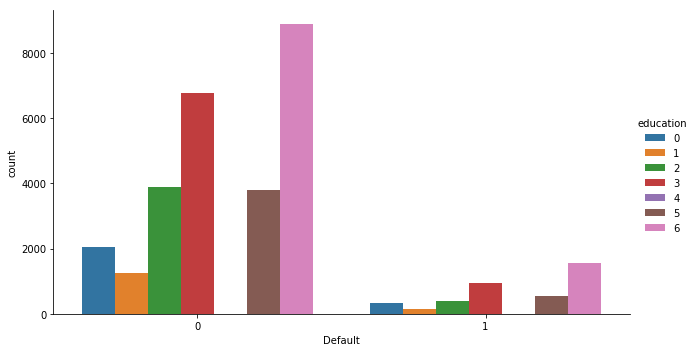

In [86]:
g = sns.factorplot('y', data=Data1, hue='education', kind='count', aspect=1.75)
g.set_xlabels('Default')
print('Education')

In [349]:
Data1.groupby(['job', 'y'])['job'].count()

job  y
0    0    7521
     1    1216
1    0    5223
     1     452
2    0     988
     1     101
3    0     603
     1      87
4    0    2025
     1     286
5    0     859
     1     357
6    0     960
     1     132
7    0    2599
     1     258
8    0     407
     1     203
9    0    4832
     1     641
10   0     612
     1     126
Name: job, dtype: int64

Trabajos


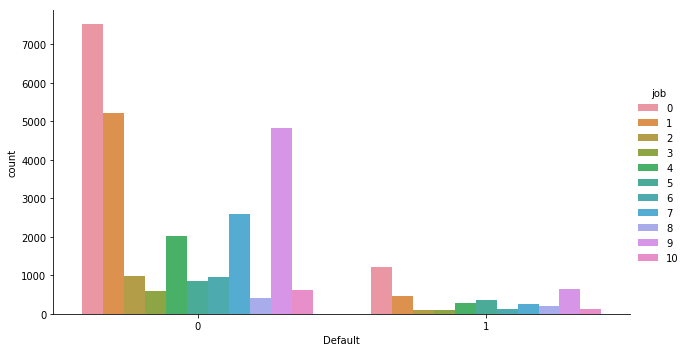

In [85]:
g = sns.factorplot('y', data=Data1, hue='job', kind='count', aspect=1.75)
g.set_xlabels('Default')
print('Trabajos')

In [351]:
Data1.groupby(['poutcome', 'y'])['poutcome'].count()

poutcome  y
0         0     2953
          1      508
1         0    23264
          1     2572
2         0      412
          1      779
Name: poutcome, dtype: int64

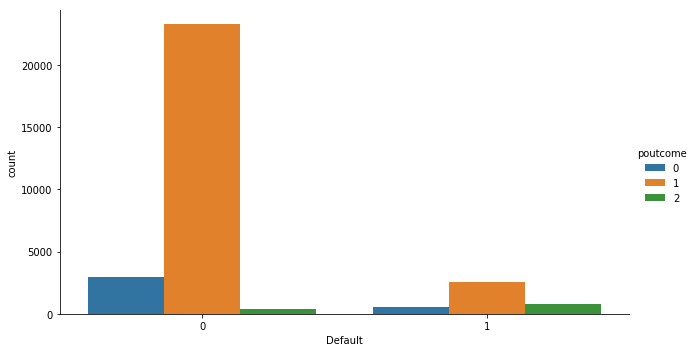

In [352]:
g = sns.factorplot('y', data=Data1, hue='poutcome', kind='count', aspect=1.75)
g.set_xlabels('Default')

In [353]:
Data1.groupby(['marital', 'y'])['marital'].count()

marital  y
0        0    15436
         1     2056
1        0     8050
         1     1393
2        0     3143
         1      410
Name: marital, dtype: int64

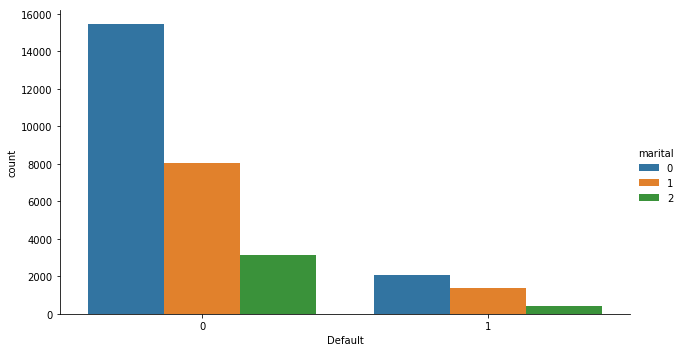

In [354]:
g = sns.factorplot('y', data=Data1, hue='marital', kind='count', aspect=1.75)
g.set_xlabels('Default')
print('Estado Civil, 0 = Casado, 1 = Soltero, 2 = Divorciado')

In [355]:
Data1.groupby(['contact', 'y'])['contact'].count()

contact  y
0        0     9459
         1      586
1        0    17170
         1     3273
Name: contact, dtype: int64

Medio de Contacto, 0 = Telefono, 1 = Celular


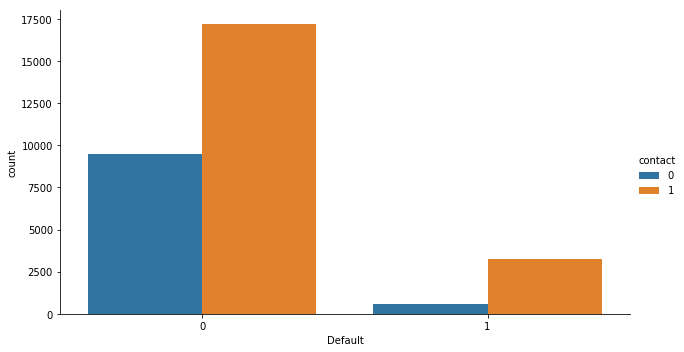

In [83]:
g = sns.factorplot('y', data=Data1, hue='contact', kind='count', aspect=1.75)
g.set_xlabels('Default')
print('Medio de Contacto, 0 = Telefono, 1 = Celular')

In [36]:
Data1.groupby(['previous', 'y'])['previous'].count()

previous  y
0         0    23264
          1     2572
1         0     2920
          1      832
2         0      336
          1      297
3         0       75
          1      115
4         0       26
          1       30
5         0        5
          1       11
6         0        2
          1        2
7         0        1
Name: previous, dtype: int64

Contactos Previos, 0 = No, # = Cantidad de días


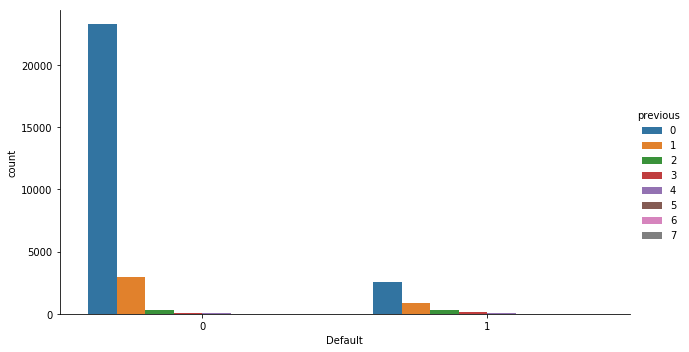

In [82]:
g = sns.factorplot('y', data=Data1, hue='previous', kind='count', aspect=1.75)
g.set_xlabels('Default')
print('Contactos Previos, 0 = No, # = Cantidad de días')

In [39]:
Data1.groupby(['pdays', 'y'])['pdays'].count()

pdays  y
0      0    26162
       1     3030
1      0       14
       1        7
2      0       22
       1       31
3      0      122
       1      259
4      0       49
       1       53
5      0       16
       1       27
6      0      108
       1      255
7      0       16
       1       34
8      0        5
       1        8
9      0       26
       1       27
10     0       15
       1       25
11     0       12
       1       13
12     0       28
       1       22
13     0        7
       1       26
14     0        7
       1       10
15     0        6
       1       16
16     0        3
       1        5
17     0        5
       1        1
18     0        3
       1        2
19     0        2
       1        1
21     1        2
22     0        1
       1        2
25     1        1
26     1        1
27     1        1
Name: pdays, dtype: int64

In [40]:
Data1.groupby(['campaign', 'y'])['campaign'].count()

campaign  y
1         0    11326
          1     1920
2         0     6853
          1     1020
3         0     3428
          1      477
4         0     1737
          1      200
5         0     1055
          1      101
6         0      643
          1       53
7         0      410
          1       30
8         0      268
          1       15
9         0      181
          1       14
10        0      154
          1       10
11        0      114
          1       10
12        0       87
          1        2
13        0       53
          1        1
14        0       47
          1        1
15        0       30
16        0       30
17        0       37
          1        4
18        0       23
19        0       18
20        0       21
21        0       14
22        0       11
23        0       13
          1        1
24        0       11
25        0        6
26        0        5
27        0        7
28        0        6
29        0        8
30        0        7
31        0        5
3

In [41]:
Data1.groupby(['duration', 'y'])['duration'].count()

duration  y
0         0     4
1         0     3
2         0     1
3         0     3
4         0    12
5         0    24
6         0    31
7         0    45
8         0    51
9         0    61
10        0    49
11        0    62
12        0    53
13        0    58
14        0    55
15        0    54
16        0    54
17        0    52
18        0    59
19        0    43
20        0    48
21        0    53
22        0    54
23        0    41
24        0    48
25        0    43
26        0    47
27        0    40
28        0    35
29        0    46
               ..
2301      1     1
2316      0     1
2372      1     1
2420      1     1
2429      0     1
2453      1     1
2456      1     1
2462      0     1
2486      1     1
2516      1     1
2621      1     1
2635      0     1
2653      1     1
2680      1     1
2692      1     1
2769      1     1
2870      0     1
3076      1     1
3094      1     1
3183      1     1
3253      0     1
3284      0     1
3322      0     1
3422      0     

In [37]:
Data1.groupby(['loan', 'y'])['loan'].count()

loan  y
0     0    22446
      1     3274
1     0     4183
      1      585
Name: loan, dtype: int64

Prestamos Personales, 0 = No, 2 = Sí


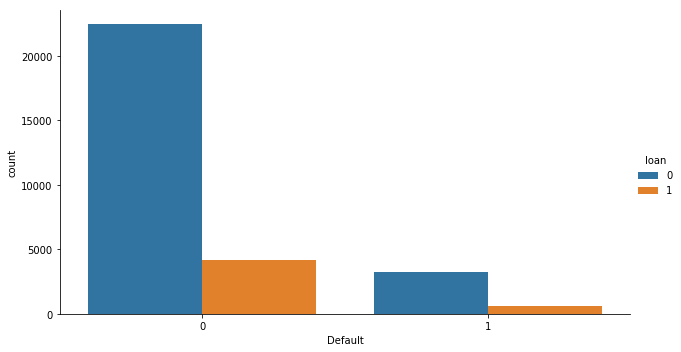

In [81]:
g = sns.factorplot('y', data=Data1, hue='loan', kind='count', aspect=1.75)
g.set_xlabels('Default')
print('Prestamos Personales, 0 = No, 2 = Sí')

In [39]:
Data1.groupby(['default', 'y'])['default'].count()

default  y
0        0    26626
         1     3859
2        0        3
Name: default, dtype: int64

Prestamos por Defecto, 0 = No, 2 = Sí


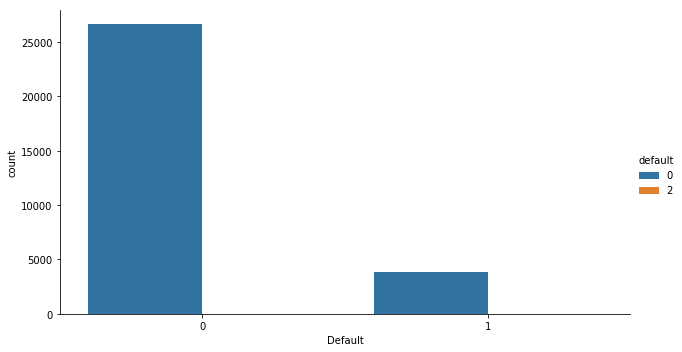

In [80]:
g = sns.factorplot('y', data=Data1, hue='default', kind='count', aspect=1.75)
g.set_xlabels('Default')
print('Prestamos por Defecto, 0 = No, 2 = Sí')

In [41]:
Data1.groupby(['housing', 'y'])['housing'].count()

housing  y
0        0    12250
         1     1717
1        0    14379
         1     2142
Name: housing, dtype: int64

Prestamos de vivienda, 0 = No, 1 = Sí


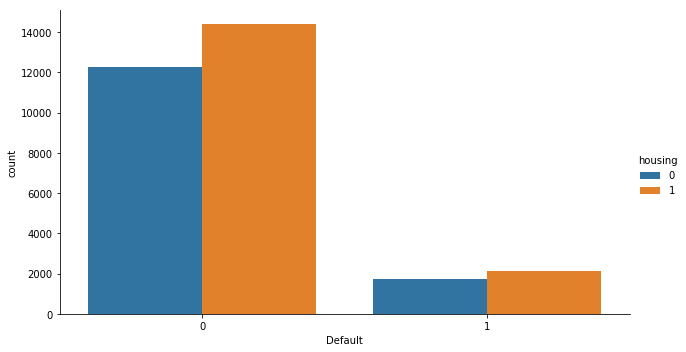

In [79]:
g = sns.factorplot('y', data=Data1, hue='housing', kind='count', aspect=1.75)
g.set_xlabels('Default')
print('Prestamos de vivienda, 0 = No, 1 = Sí')

In [67]:
prediction = pd.DataFrame(X_test).to_csv('Predictions.csv')